<a href="https://colab.research.google.com/github/AashirA1/Project/blob/main/cat_v_Dog_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.kaggle.com/datasets/salader/dogsvscats/data

--2025-11-09 09:48:26--  https://www.kaggle.com/datasets/salader/dogsvscats/data
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data’

data                    [ <=>                ]   8.67K  --.-KB/s    in 0.01s   

2025-11-09 09:48:27 (871 KB/s) - ‘data’ saved [8881]



First, you'll need to install the Kaggle library.

In [2]:
!pip install kaggle

Next, you need to upload your Kaggle API key (`kaggle.json`) to your Colab environment. You can get this file from your Kaggle account settings.

In [8]:
from google.colab import files
files.upload()  # kaggle.json select karo


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashirasad","key":"d8617126984dcd6a2dd40906353806cb"}'}

Once you have uploaded the `kaggle.json` file, move it to the correct directory and set the appropriate permissions.

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Now you can download the dataset using the Kaggle API command. You can find the dataset's API command on the dataset page under the '...' menu. For example, the command for the `salader/dogsvscats` dataset is `kaggle datasets download -d salader/dogsvscats`.

In [10]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 158MB/s]
100% 1.06G/1.06G [00:05<00:00, 220MB/s]


Finally, you might need to unzip the downloaded dataset.

In [11]:
import zipfile
import os

for file in os.listdir():
    if file.endswith('.zip'):
        zip_ref = zipfile.ZipFile(file, 'r')
        zip_ref.extractall()
        zip_ref.close()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.callbacks import EarlyStopping


In [33]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    shuffle=False
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [28]:
data_augmentation = keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
])

In [29]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    image = data_augmentation(image)  # ✅ augmentation applied here
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(lambda x, y: (tf.cast(x / 255.0, tf.float32), y))


In [30]:
# CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1

)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=validation_ds,
    callbacks=[early_stop]
)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 199ms/step - accuracy: 0.5807 - loss: 1.2410 - val_accuracy: 0.5762 - val_loss: 0.7076
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 174ms/step - accuracy: 0.7102 - loss: 0.5687 - val_accuracy: 0.6884 - val_loss: 0.5820
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.7635 - loss: 0.4896 - val_accuracy: 0.7398 - val_loss: 0.5360
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.8038 - loss: 0.4266 - val_accuracy: 0.6214 - val_loss: 0.8133
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.8306 - loss: 0.3811 - val_accuracy: 0.7134 - val_loss: 0.6378
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - accuracy: 0.8808 - loss: 0.2875 - val_accuracy: 0.7474 - val_loss: 0.6931
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 174ms/step - accuracy: 0.9055 - loss: 0.2286 - val_accuracy: 0.7886 - val_loss: 0.4765
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - accuracy: 0.9329 - loss: 0

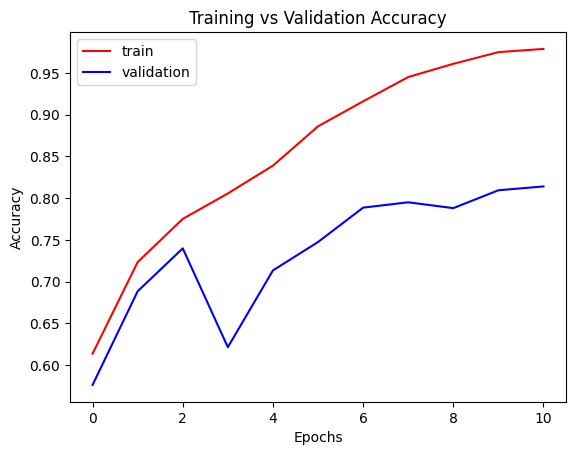

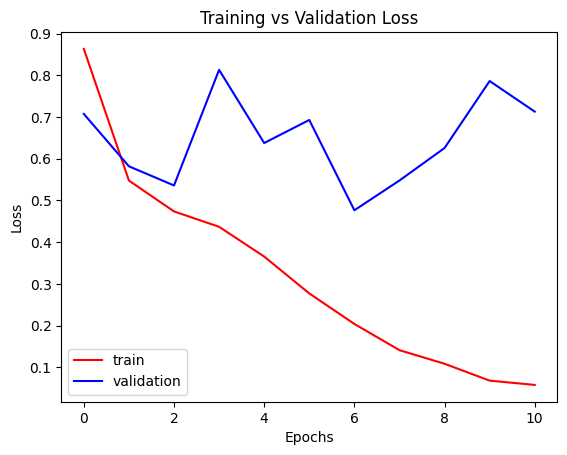

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='red')
plt.plot(history.history['val_accuracy'], label='validation', color='blue')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train', color='red')
plt.plot(history.history['val_loss'], label='validation', color='blue')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import cv2

test_image = cv2.imread('/content/cat.jpg')
plt.imshow(test_image)
test_image = cv2.resize(test_image, (256,256))
test_input = test_image.reshape((1,256,256,3))

print(model.predict(test_input))

# Save model
model.save('cats_vs_dogs_model.keras')